### Data pre-processing

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


train_data = pd.read_csv('./data/movies/movies_train.csv')
test_data = pd.read_csv('./data/movies/movies_test.csv')

In [ ]:
train_data

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


## 이상치 제거

In [ ]:
def find_outlier(data, col):
    box_bottom = data[col].quantile(.25)
    box_top = data[col].quantile(.75)

    IQR = box_top - box_bottom

    out_top = data[data[col]>box_top+1.5*IQR]
    out_bottom = data[data[col]<box_bottom-1.5*IQR]
    
    return out_top.index, out_bottom.index

list_key = ['time', 'num_staff','dir_prev_bfnum','num_actor','dir_prev_num']
out_list = []
for i in list_key:
    out_t, out_b = find_outlier(train_data,'time')
    for j in out_t:
        out_list.append(j)
    for j in out_b:
        out_list.append(j)
        
out_list = list(set(out_list))
train_data.drop(out_list,inplace = True)

In [ ]:
#data pre-processing train
train_data['dir_prev_bfnum'] = train_data['dir_prev_bfnum'].fillna(0)
freq_distributor = train_data.groupby('distributor').size()

list_dis = []
for i in train_data.index:
    list_dis.append(freq_distributor[train_data['distributor'][i]])
train_data['freq_distributor'] = list_dis

train_data = pd.get_dummies(train_data, columns=['genre'], prefix='genre')
train_data = pd.get_dummies(train_data, columns=['screening_rat'], prefix='screening_rat')
#train_data.drop(columns = ['title','distributor','director','release_time','screening_rat_12세 관람가','genre_SF'], inplace=True)

train_data.drop(columns = ['title','distributor','director','release_time'], inplace=True)

In [ ]:
dummy_xdata = train_data.iloc[:,7:]
numeric_xdata = train_data.iloc[:,:7]

In [ ]:
test_data['dir_prev_bfnum'] = test_data['dir_prev_bfnum'].fillna(0)
freq_distributor = test_data.groupby('distributor').size()
list_dis = []
for i in range(len(test_data)):
    list_dis.append(freq_distributor[test_data['distributor'][i]])
test_data['freq_distributor'] = list_dis

test_data = pd.get_dummies(test_data, columns=['genre'], prefix='genre')
test_data = pd.get_dummies(test_data, columns=['screening_rat'], prefix='screening_rat')

test_data.drop(columns = ['title','distributor','director','release_time'], inplace=True)

In [ ]:
dummy_tdata = test_data.iloc[:,6:]
numeric_tdata = test_data.iloc[:,:6]

Data Normalize

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(numeric_xdata)
numeric_xdata_std = sc.transform(numeric_xdata)

sc.fit(numeric_tdata)
numeric_tdata_std = sc.transform(numeric_tdata)

x_data = pd.DataFrame(numeric_xdata_std, columns=numeric_xdata.keys())
t_data = pd.DataFrame(numeric_tdata_std, columns=numeric_tdata.keys())

train_xdata = pd.concat([x_data, dummy_xdata], axis=1)
target_tdata = pd.concat([t_data, dummy_tdata], axis=1)

## Data split

In [ ]:
train_ydata = train_data['box_off_num']
train_xdata = train_data.drop(columns='box_off_num', inplace=False)

train_Xdata, test_Xdata, train_ydata, test_tdata = train_test_split(train_xdata,train_ydata, test_size=0.3, random_state=100)

In [ ]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
time,600.0,100.863333,1.809753e+01,45.0,89.00,100.0,114.000,180.0
dir_prev_bfnum,600.0,472699.301139,1.309474e+06,0.0,0.00,0.0,376141.625,17615314.0
dir_prev_num,600.0,0.876667,1.183409e+00,0.0,0.00,0.0,2.000,5.0
num_staff,600.0,151.118333,1.656547e+02,0.0,17.00,82.5,264.000,869.0
num_actor,600.0,3.706667,2.446889e+00,0.0,2.00,3.0,4.000,25.0
box_off_num,600.0,708181.751667,1.828006e+06,1.0,1297.25,12591.0,479886.750,14262766.0
freq_distributor,600.0,17.876667,1.873125e+01,1.0,3.00,10.0,29.000,54.0
genre_SF,600.0,0.021667,1.457141e-01,0.0,0.00,0.0,0.000,1.0
genre_공포,600.0,0.070000,2.553599e-01,0.0,0.00,0.0,0.000,1.0
genre_느와르,600.0,0.045000,2.074771e-01,0.0,0.00,0.0,0.000,1.0


### Linear_Regression

In [ ]:
#train_Xdata, test_Xdata, train_ydata, test_tdata 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_Xdata, train_ydata)
predicted = model.predict(test_Xdata)

In [ ]:
model_score = model.score(test_Xdata,test_tdata)

In [ ]:
print("\n> 모델 평가 점수 :", model_score)


> 모델 평가 점수 : 0.23015226892200205


### Keras_Sequential 모델 (RMSprop optimizer)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [ ]:
#train_Xdata, test_Xdata, train_ydata, test_tdata 
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_Xdata.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model()

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    train_Xdata, train_ydata,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.488374e+12,817483.1250,2.488374e+12,5.672896e+12,1070367.375,5.672896e+12,995
996,2.327104e+12,842958.5000,2.327104e+12,6.520270e+12,1123345.875,6.520270e+12,996
997,2.254454e+12,807768.6875,2.254454e+12,5.587404e+12,1113107.750,5.587404e+12,997
998,2.200053e+12,821905.8750,2.200053e+12,5.694355e+12,1158229.375,5.694355e+12,998
999,2.208175e+12,830567.5000,2.208175e+12,5.692959e+12,1065199.125,5.692959e+12,999


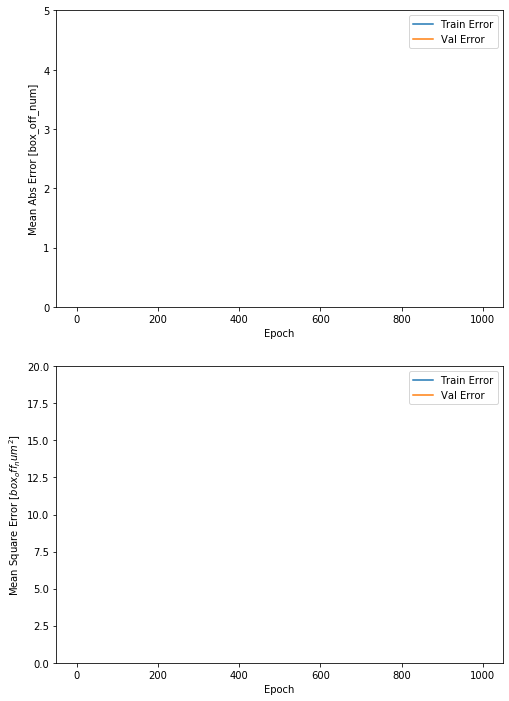

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [box_off_num]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$box_off_num^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)


..........................

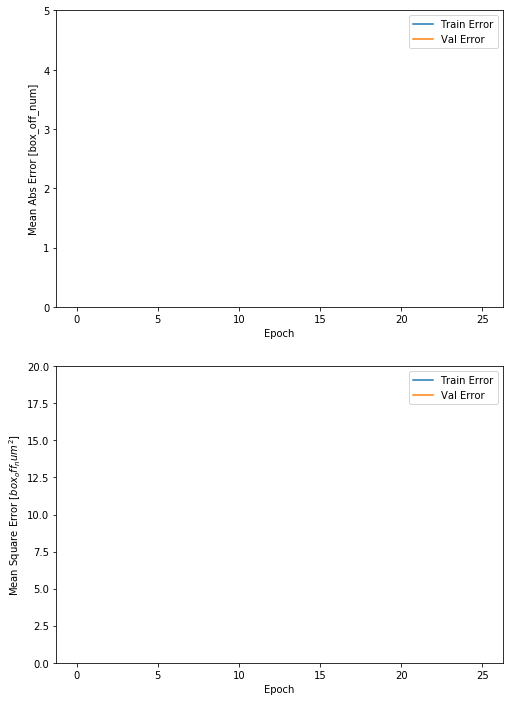

In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_Xdata, train_ydata, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
test_predictions = model.predict(test_Xdata).flatten()

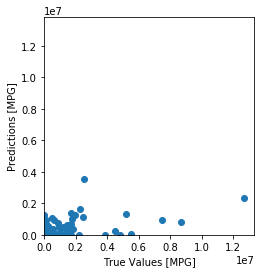

In [ ]:
plt.scatter(test_tdata, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

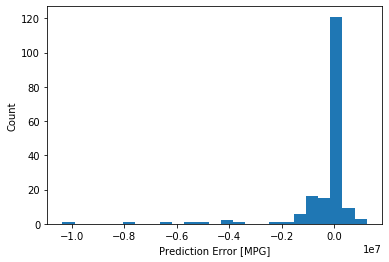

In [ ]:
error = test_predictions - test_tdata
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
test_predictions = model.predict(target_tdata)

In [ ]:
submit = pd.read_csv('./data/movies/submission.csv')
submit['box_off_num'] = prediction
submit.to_csv('C:/Users/smj71/Desktop/sub1.csv', index= False)

### RandomForestRegressor

In [ ]:
train_Xdata.drop(columns=['genre_미스터리','screening_rat_전체 관람가','genre_서스펜스','genre_뮤지컬','genre_애니메이션',
                          'genre_다큐멘터리'],inplace=True)
test_Xdata.drop(columns=['genre_미스터리','screening_rat_전체 관람가','genre_서스펜스','genre_뮤지컬','genre_애니메이션',
                          'genre_다큐멘터리'],inplace=True)
train_data.drop

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MSE
1325783.0387015494


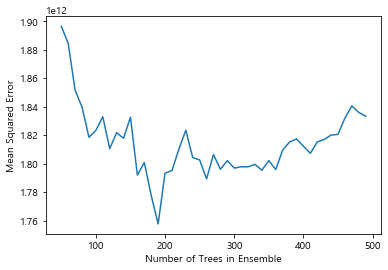

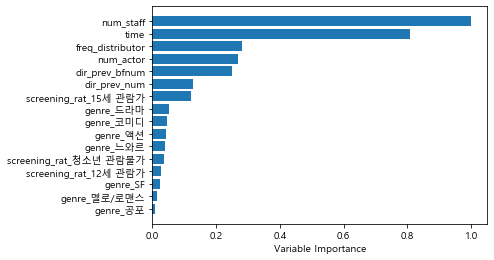

In [ ]:
import numpy
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

mseOos = []
mse_iter = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat = 8#조정해볼 것
    RFModel = RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=777)
    RFModel.fit(train_Xdata, train_ydata)
    #데이터 세트에 대한 MSE 누적
    prediction = RFModel.predict(test_Xdata)
    mseOos.append(mean_squared_error(test_tdata, prediction))
    mse_iter.append(iTrees)
    
print("MSE")
print(np.sqrt(np.min(mseOos)))
 
#트레이닝 테스트 오차 대비  앙상블의 트리 개수 도표 그리기
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()
 
#피처 중요도 도표 그리기
featureImportance = RFModel.feature_importances_
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = numpy.argsort(featureImportance)
barPos = numpy.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, train_Xdata.keys()[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()

In [ ]:
val = [[1222367,1,50],[1278777,2,50],[1257566,3,50],[1268335,4,50],[]

In [ ]:
mse = []
for i in mseOos:
    for j in mse_iter:
        mse.append([i,j])
min(mse)

[1671268906737.3643, 50]

In [ ]:
target_tdata.drop(columns=['genre_미스터리','screening_rat_전체 관람가','genre_서스펜스','genre_뮤지컬','genre_애니메이션',
                          'genre_다큐멘터리'],inplace=True)
train_xdata.drop(columns=['genre_미스터리','screening_rat_전체 관람가','genre_서스펜스','genre_뮤지컬','genre_애니메이션',
                          'genre_다큐멘터리'],inplace=True)
train_ydata.drop(columns=['genre_미스터리','screening_rat_전체 관람가','genre_서스펜스','genre_뮤지컬','genre_애니메이션',
                          'genre_다큐멘터리'],inplace=True)

depth = None
maxFeat = 3#조정해볼 것
RFModel = RandomForestRegressor(n_estimators=50,
                max_depth=depth, max_features=maxFeat,
                oob_score=False, random_state=777)
RFModel.fit(train_xdata, train_ydata)
    #데이터 세트에 대한 MSE 누적
prediction = RFModel.predict(target_tdata)

KeyError: "['genre_미스터리' 'screening_rat_전체 관람가' 'genre_서스펜스' 'genre_뮤지컬'\n 'genre_애니메이션' 'genre_다큐멘터리'] not found in axis"

### LGBM Bossting 

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=0, n_estimators=1000)

In [ ]:
fe = ["time","dir_prev_bfnum","dir_prev_num","num_staff","num_actor","freq_distributor"]

In [ ]:
model.fit(train_Xdata[fe], train_ydata)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predicted = model.predict(test_Xdata[fe])
model_score = model.score(test_Xdata[fe],test_tdata)

In [ ]:
test_pre = model.predict(target_tdata[fe])

In [ ]:
submit = pd.read_csv('./data/movies/submission.csv')
submit['box_off_num'] = test_pre
submit.to_csv('C:/Users/smj71/Desktop/sub_lgbm.csv', index= False)

### CNN for regression

In [ ]:
print("X.shape", train_Xdata.shape)  #X.shape (420,22)
print("Y.shape", train_ydata.shape) #Y.shape (420)

X.shape (420, 20)
Y.shape (420,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
X = train_Xdata.to_numpy()
y = train_ydata.to_numpy()

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
print("X.shape[0]",X.shape[0]) #X.shape[0] 4
print(" X.shape[1]", X.shape[1])#X.shape[1] 3
print("X.shape", X.shape)  #X.shape (4, 3, 1)
print("Y.shape", y.shape) #Y.shape (4,)

X.shape[0] 420
 X.shape[1] 20
X.shape (420, 20, 1)
Y.shape (420,)


In [ ]:
model = keras.Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(22, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='RMSprop', loss='mse')

In [ ]:
model.fit(X, y, epochs=10000, verbose=0)

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 640 but received input with shape [None, 576]


In [ ]:
X_test = target_tdata.to_numpy()
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
# demonstrate prediction
yhat = model.predict(X_test, verbose=0)

In [ ]:
submit = pd.read_csv('./data/movies/submission.csv')
submit['box_off_num'] = yhat
submit.to_csv('C:/Users/smj71/Desktop/sub5.csv', index= False)

In [ ]:
model.fit()